In [1]:
import torch

# Create a tensor with gradient tracking
x = torch.tensor(2.0, requires_grad=True)


In [2]:
# Perform operations
y = x ** 2 + 3 * x


In [3]:
# Compute gradients
y.backward()

# Access the gradient
print(x.grad)  # Output: dy/dx at x = 2.0


tensor(7.)


In [4]:
# Temporarily disable gradient tracking
with torch.no_grad():
    z = x * 2

# Detach a tensor from the computation graph
x_detached = x.detach()


In [5]:
optimizer = torch.optim.SGD([x], lr=0.01)
optimizer.zero_grad()  # Clear gradients


In [6]:
import torch

# Define a tensor
x = torch.tensor(3.0, requires_grad=True)

# Perform operations
y = x ** 3 - 4 * x ** 2 + 2 * x + 1

# Compute gradients
y.backward()

# Print the gradient
print(f"Gradient at x={x.item()}: {x.grad.item()}")


Gradient at x=3.0: 5.0


Epoch 50/500, Loss: 0.6063
Epoch 100/500, Loss: 0.4321
Epoch 150/500, Loss: 0.4089
Epoch 200/500, Loss: 0.3954
Epoch 250/500, Loss: 0.3835
Epoch 300/500, Loss: 0.3727
Epoch 350/500, Loss: 0.3625
Epoch 400/500, Loss: 0.3531
Epoch 450/500, Loss: 0.3448
Epoch 500/500, Loss: 0.3372


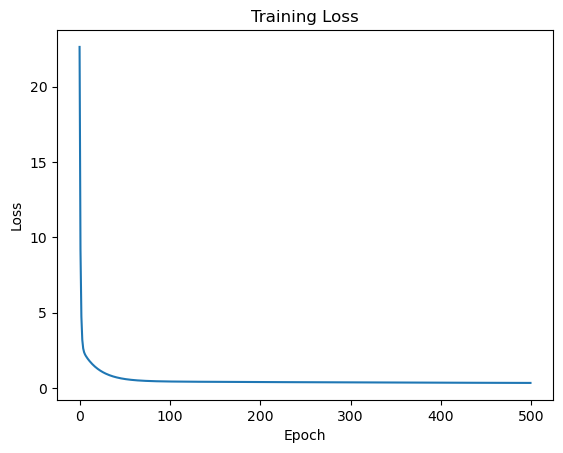

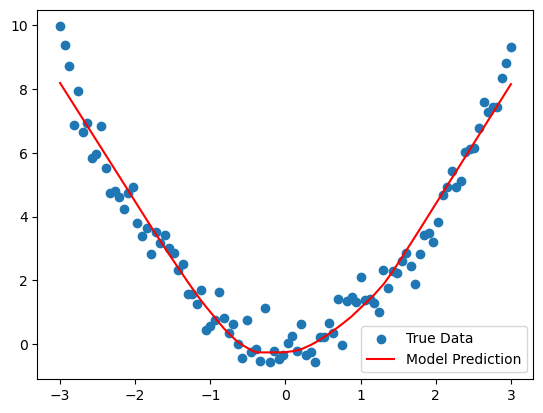

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data
torch.manual_seed(42)
x = torch.linspace(-3, 3, 100).reshape(-1, 1)  # Inputs
y = x ** 2 + torch.randn(x.size()) * 0.5      # Quadratic function + noise

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),  # Input layer
            nn.ReLU(),         # Activation
            nn.Linear(64, 1)   # Output layer
        )

    def forward(self, x):
        return self.net(x)

# Create the model
model = SimpleNN()

# Define the loss function (mean squared error for regression)
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 500
losses = []

for epoch in range(epochs):
    # Zero the gradient buffers
    optimizer.zero_grad()
    
    # Forward pass
    predictions = model(x)
    loss = criterion(predictions, y)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    # Record and print the loss
    losses.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

# Visualize the training loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Plot the predictions
with torch.no_grad():
    plt.scatter(x, y, label="True Data")
    plt.plot(x, model(x), color="red", label="Model Prediction")
    plt.legend()
    plt.show()


In [8]:
import torch

x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
y.backward()  # Computes dy/dx
print(x.grad)  # Output: 4.0


tensor(4.)


In [9]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
grad = torch.autograd.grad(y, x)  # Gradient of y w.r.t. x
print(grad)  # Output: (4.0,)


(tensor(4.),)


In [10]:
with torch.no_grad():
    x = torch.tensor(2.0, requires_grad=True)
    y = x ** 2
    print(y.requires_grad)  # Output: False


False


In [11]:
class MyFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input ** 2

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        return grad_output * 2 * input

x = torch.tensor(2.0, requires_grad=True)
y = MyFunction.apply(x)
y.backward()
print(x.grad)  # Output: 4.0


tensor(4.)


In [14]:
torch.autograd.set_detect_anomaly(True)
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
y.backward()  # Triggers debug info if an error occurs


In [15]:
import torch

x = torch.tensor(2.0, requires_grad=True)
y = x ** 3
grad = torch.autograd.grad(y, x)  # Compute dy/dx
print(grad)  # Output: (12.0,) since dy/dx = 3x^2


(tensor(12.),)
